# EfficientNetB2 Model 3b
## Preprocessing method: image_dataset_from_directory()
## Image size: (260, 260) 
## Images: RGB
## Frozen pretrained layers
## No image transformation

In [1]:
import pandas as pd
import numpy as np
import io
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
path_training = 'gender_images/Training/'
path_validation = 'gender_images/Validation/'

In [3]:
image_size = (260, 260)
batch_size = 128
train_ds = tf.keras.preprocessing.image_dataset_from_directory(path_training,
                                                               color_mode = "rgb",
                                                               seed=1993,
                                                               image_size = image_size)

val_ds =  tf.keras.preprocessing.image_dataset_from_directory(path_validation,
                                                              seed=1993,
                                                              color_mode = "rgb",
                                                              image_size = image_size)

one_hot_encoded_train_ds = train_ds.map(lambda x, y: (x, tf.one_hot(y, depth=2)))
one_hot_encoded_val_ds = val_ds.map(lambda x, y: (x, tf.one_hot(y, depth=2)))

Found 47009 files belonging to 2 classes.
Found 11649 files belonging to 2 classes.


In [4]:
plt.figure(figsize=(10, 10))
class_names = val_ds.class_names
for images, labels in val_ds.take(1):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [5]:
train_label = np.concatenate([y for x, y in train_ds], axis=0)
valid_label = np.concatenate([y for x, y in val_ds], axis=0)

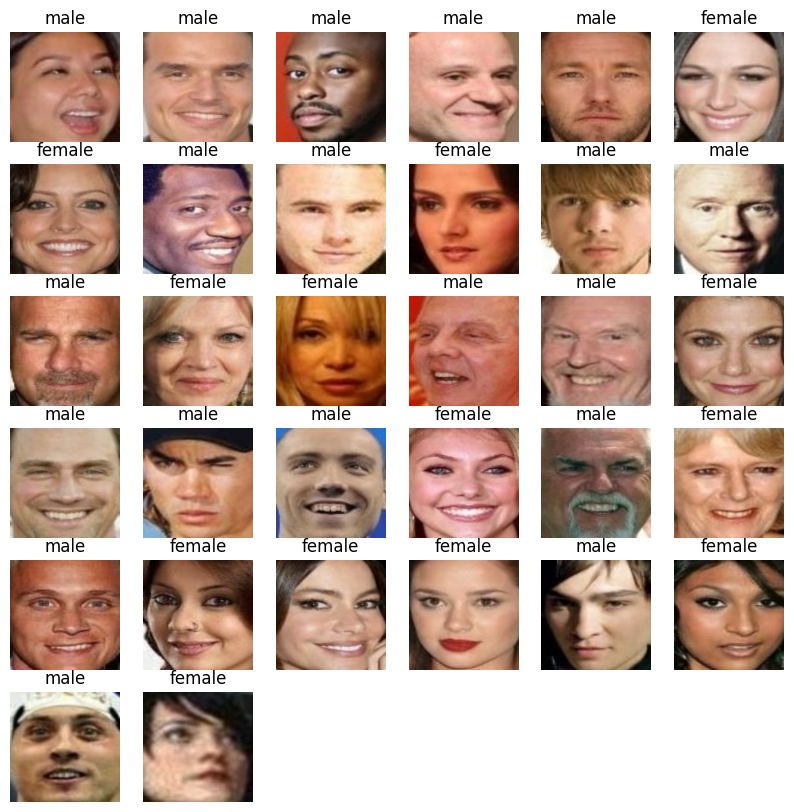

In [6]:
plt.show()

In [7]:
ENB2_model = keras.applications.EfficientNetB2(weights='imagenet', include_top=True)
ENB2_model.trainable = False

# Model layers
input_tensor = tf.keras.layers.Input(shape=(260, 260, 3))
x = ENB2_model(input_tensor)
out = keras.layers.Dense(2, activation='softmax')(x)

# Set early stopping after certain number of epochs
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
epochs=1000     # Set epochs

# Generate model
model = keras.Model(inputs = input_tensor, outputs = out)
model.compile(optimizer=keras.optimizers.Adam(1e-2),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 260, 260, 3)]     0         
                                                                 
 efficientnetb2 (Functional)  (None, 1000)             9177569   
                                                                 
 dense (Dense)               (None, 2)                 2002      
                                                                 
Total params: 9,179,571
Trainable params: 2,002
Non-trainable params: 9,177,569
_________________________________________________________________


In [8]:
mod_fit = model.fit(one_hot_encoded_train_ds, 
                      epochs=epochs, 
                      validation_data=one_hot_encoded_val_ds,
                      callbacks=[callback])

Epoch 1/1000
1470/1470 [==============================] - 86s 53ms/step - loss: 0.4154 - accuracy: 0.8701 - val_loss: 0.2950 - val_accuracy: 0.9016
Epoch 2/1000
1470/1470 [==============================] - 75s 51ms/step - loss: 0.3089 - accuracy: 0.8854 - val_loss: 0.2613 - val_accuracy: 0.9060
Epoch 3/1000
1470/1470 [==============================] - 75s 51ms/step - loss: 0.2893 - accuracy: 0.8925 - val_loss: 0.2494 - val_accuracy: 0.9103
Epoch 4/1000
1470/1470 [==============================] - 75s 51ms/step - loss: 0.2820 - accuracy: 0.8941 - val_loss: 0.2438 - val_accuracy: 0.9109
Epoch 5/1000
1470/1470 [==============================] - 75s 51ms/step - loss: 0.2773 - accuracy: 0.8950 - val_loss: 0.2399 - val_accuracy: 0.9113
Epoch 6/1000
1470/1470 [==============================] - 75s 51ms/step - loss: 0.2753 - accuracy: 0.8973 - val_loss: 0.2373 - val_accuracy: 0.9127
Epoch 7/1000
1470/1470 [==============================] - 75s 51ms/step - loss: 0.2716 - accuracy: 0.8987 - val_

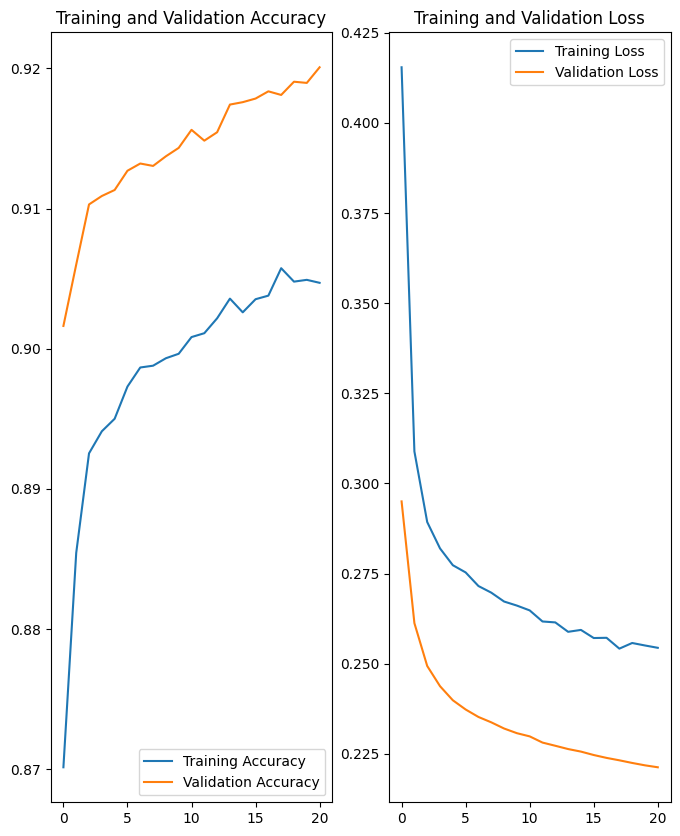

In [12]:
acc= mod_fit.history['accuracy']
val_acc = mod_fit.history['val_accuracy']

loss = mod_fit.history['loss']
val_loss = mod_fit.history['val_loss']

epochs_range = range(0, 21)

plt.figure(figsize=(8, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
model.save('GC weights/Frozen/mod3b-RGB')
model.save_weights('GC weights/Frozen/mod3b-RGB/mod3b_RGB_frozen.h5')

INFO:tensorflow:Assets written to: GC weights/Frozen/mod3b-RGB/assets


INFO:tensorflow:Assets written to: GC weights/Frozen/mod3b-RGB/assets


TypeError: Unable to serialize [2.0896919 2.1128857 2.1081853] to JSON. Unrecognized type <class 'tensorflow.python.framework.ops.EagerTensor'>.